# machine_learning.ipynb



In [1]:

# 1. Importación de librerías

import os
import pandas as pd
import numpy as np


# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")



## 2. Carga de datos

En este apartado, definimos las rutas de los archivos `.xlsx` que contienen los distintos **X_train** y **X_test** (con outliers, sin outliers, normalizados, escalados, etc.), así como los vectores `y_train` y `y_test`. 


In [2]:

# 2. Carga de datos

# Ruta base a la carpeta processed
BASE_PATH = "/workspaces/machine-learning-arbol-de-decision/data/processed"

# Archivos disponibles según tu carpeta
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]

# Carga de datasets
TRAIN_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TRAIN_PATHS]
TEST_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TEST_PATHS]

# Carga de las variables objetivo
y_train = pd.read_excel(os.path.join(BASE_PATH, "y_train.xlsx")).iloc[:, 0]
y_test = pd.read_excel(os.path.join(BASE_PATH, "y_test.xlsx")).iloc[:, 0]

# Verificación
print("Cantidad de datasets de TRAIN cargados:", len(TRAIN_DATASETS))
print("Cantidad de datasets de TEST cargados:", len(TEST_DATASETS))


Cantidad de datasets de TRAIN cargados: 6
Cantidad de datasets de TEST cargados: 6


In [3]:
# Cargar los datos procesados
train_data = pd.read_csv("/workspaces/machine-learning-arbol-de-decision/data/processed/clean_train_data.csv")
test_data = pd.read_csv("/workspaces/machine-learning-arbol-de-decision/data/processed/clean_test_data.csv")
 
# Mostrar las primeras filas de los datos de entrenamiento
print("Datos de entrenamiento:")
print(train_data.head())

Datos de entrenamiento:
   Pregnancies  Glucose   BMI  DiabetesPedigreeFunction   Age  Outcome
0          2.0     84.0   0.0                     0.304  21.0        0
1          9.0    112.0  28.2                     1.282  50.0        1
2          1.0    139.0  28.7                     0.654  22.0        0
3          0.0    161.0  21.9                     0.254  65.0        0
4          6.0    134.0  46.2                     0.238  46.0        1


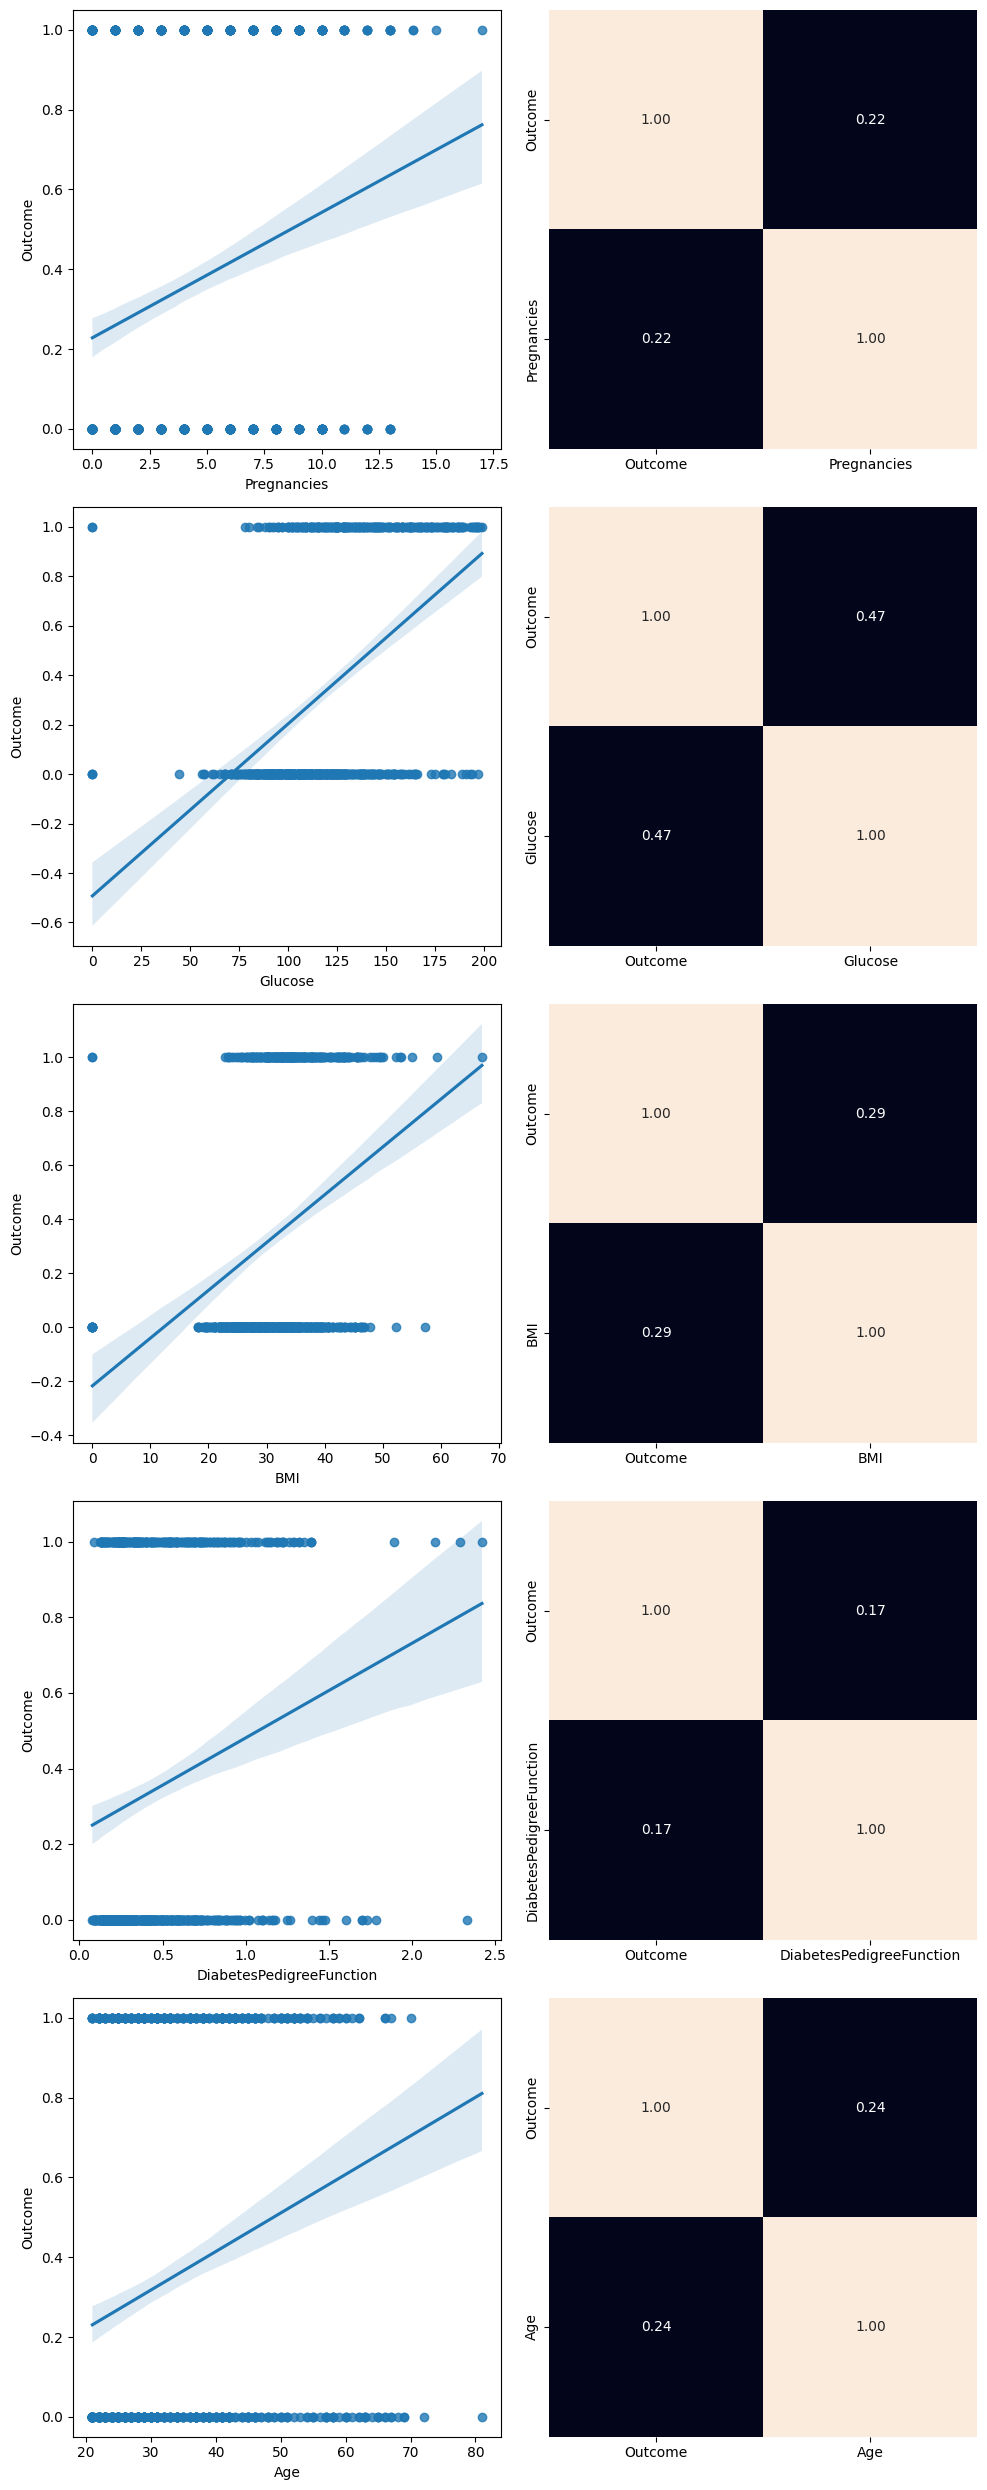

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Concatenar datos de entrenamiento y prueba para análisis
total_data = pd.concat([train_data, test_data], ignore_index=True)
 
# Crear gráficos de regresión y matrices de correlación
variables = ["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction", "Age"]  # Lista de variables a analizar
fig, axis = plt.subplots(len(variables), 2, figsize=(10, 5 * len(variables)))
 
for i, var in enumerate(variables):
   # Regresión entre la variable y 'Outcome'
   sns.regplot(data=total_data, x=var, y="Outcome", ax=axis[i, 0])
   # Matriz de correlación entre la variable y 'Outcome'
   sns.heatmap(total_data[["Outcome", var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
 
# Ajustar la visualización
plt.tight_layout()
plt.show()


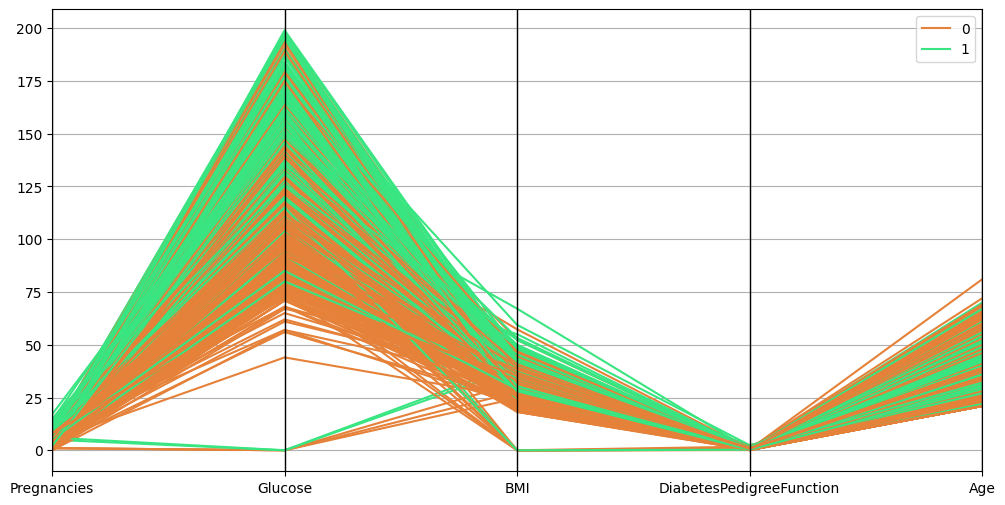

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [6]:
# Separar las características (X) y la variable objetivo (y) en los datos de entrenamiento y prueba
X_train = train_data.drop(["Outcome"], axis=1)  # Eliminar 'Outcome' del conjunto de características
y_train = train_data["Outcome"]  # Variable objetivo para entrenamiento
X_test = test_data.drop(["Outcome"], axis=1)  # Hacer lo mismo para el conjunto de prueba
y_test = test_data["Outcome"]  # Variable objetivo para prueba

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

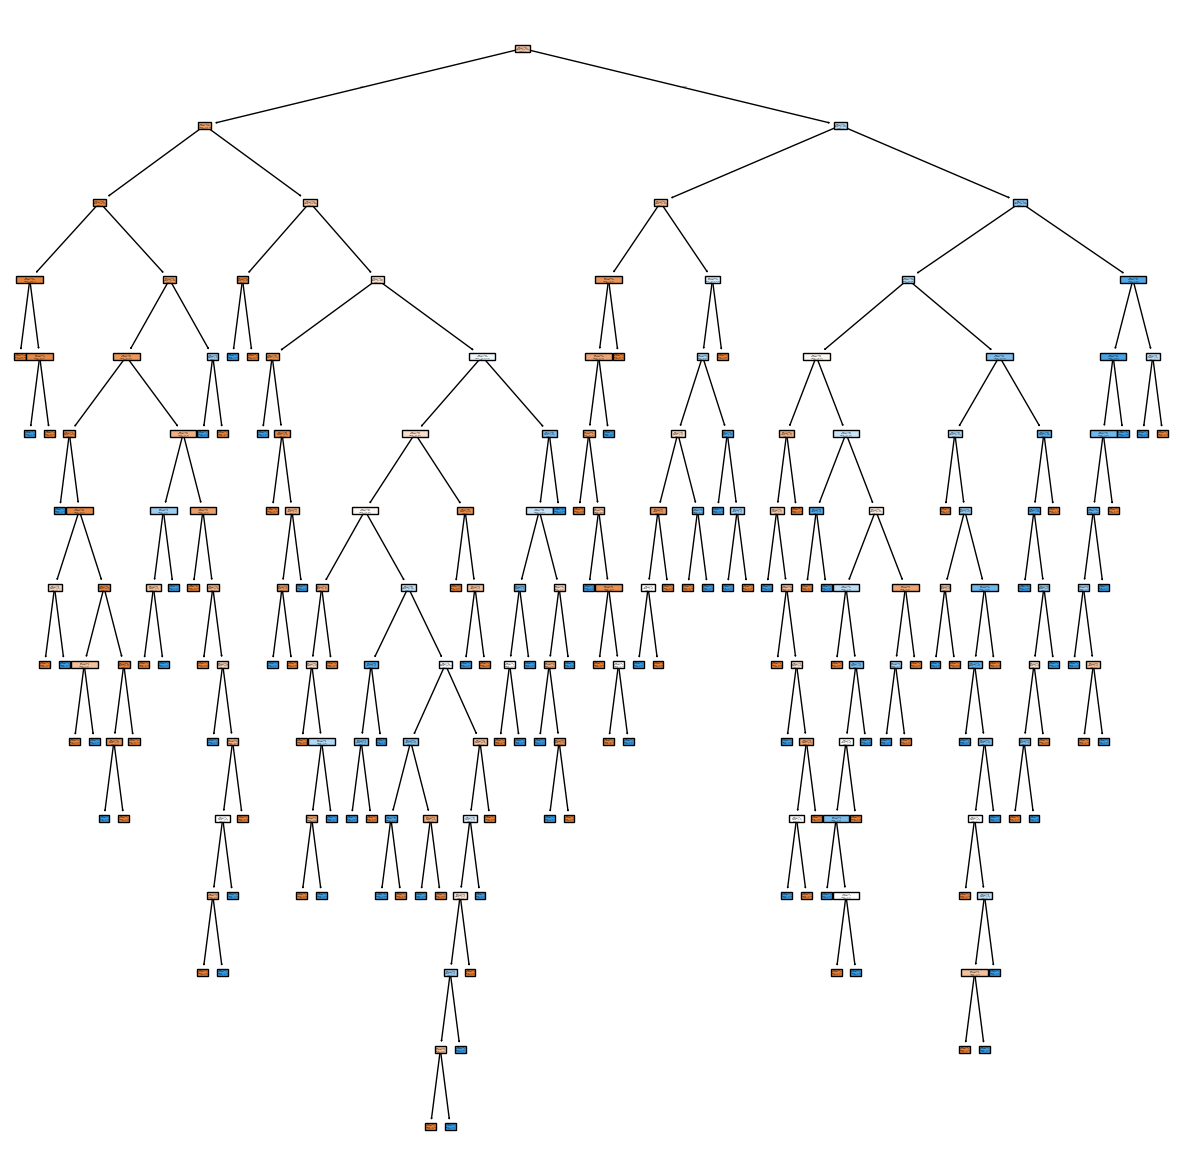

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [9]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
 
# Mostrar las predicciones
print("Predicted Charges:")
print(y_pred)

Predicted Charges:
[0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0]


In [10]:
# Calcular accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7077922077922078

# Mejora del modelo

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [13]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

In [16]:
from joblib import dump

dump(model, '/workspaces/machine-learning-arbol-de-decision/models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.joblib')


['/workspaces/machine-learning-arbol-de-decision/models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.joblib']